In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mat_patches

In [124]:
def show(img, ax=None, patches=None, lines=None, color='r'):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    #plt.imshow(img, cmap='gray')
    if patches:
        for ((x1,y1),(w,h)) in patches:
            rect = mat_patches.Rectangle((x1,y1), w, h, linewidth=1, edgecolor=color, facecolor='none')
            ax.add_patch(rect)
    if lines:
        for (x1,y1,x2,y2) in lines:
            ax.axline((x1,y1), (x2,y2), c=color)
            
    # plt.figure(figsize=(12, 8))
    ax.imshow(img, cmap='gray');

In [101]:
def cmyk_to_luminance(c, m, y, k):
    c = c * (1 - k) + k
    m = m * (1 - k) + k
    y = y * (1 - k) + k

    r, g, b = (1 - c), (1 - m), (1 - y)
    y = 0.299 * r + 0.587 * g + 0.114 * b
    return y

def convert_to_grayscale(img):
    gray = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            c, m, y, k = img[i, j]
            gray[i, j] = cmyk_to_luminance(c, m, y, k)
    gray /= np.max(gray)
    return gray

In [102]:
left_img = plt.imread('data/stereo-corridor_l.gif')
right_img = plt.imread('data/stereo-corridor_r.gif')

left_img = convert_to_grayscale(left_img)
right_img = convert_to_grayscale(right_img)

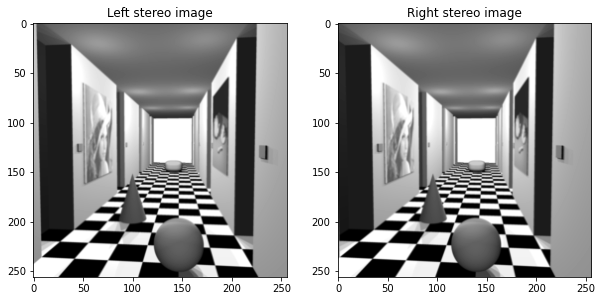

In [184]:
fig, axs = plt.subplots(1,2, figsize=(10, 8))
axs[0].set_title('Left stereo image')
axs[1].set_title('Right stereo image')
show(left_img, ax=axs[0])
show(right_img, ax=axs[1])

In [115]:
def get_patch(img, patch_loc, patch_size):
    x, y = patch_loc[0], patch_loc[1]
    w, h = patch_size[0], patch_size[1]
    patch = img[y:y+h, x:x+w]
    return patch

def show_patch(patch):
    plt.imshow(patch, cmap='gray')

In [160]:
def get_strip(img, patch_loc, patch_size):
    x, y = patch_loc[0], patch_loc[1]
    w, h = patch_size[0], patch_size[1]
    strip = img[y:y+h, :-w]
    return strip

def show_strip(strip):
    plt.figure(figsize=(15, 10))
    plt.imshow(strip, cmap='gray')

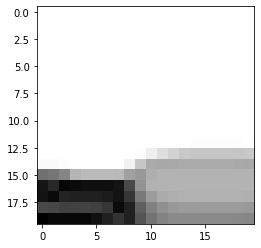

In [169]:
patch_loc = [125, 125]
patch_size = [20,20]

patch = get_patch(left_img, patch_loc, patch_size)
show_patch(patch)

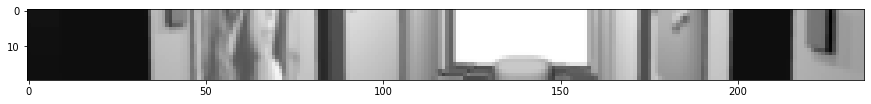

In [170]:
strip = get_strip(right_img, patch_loc, patch_size)
show_strip(strip)

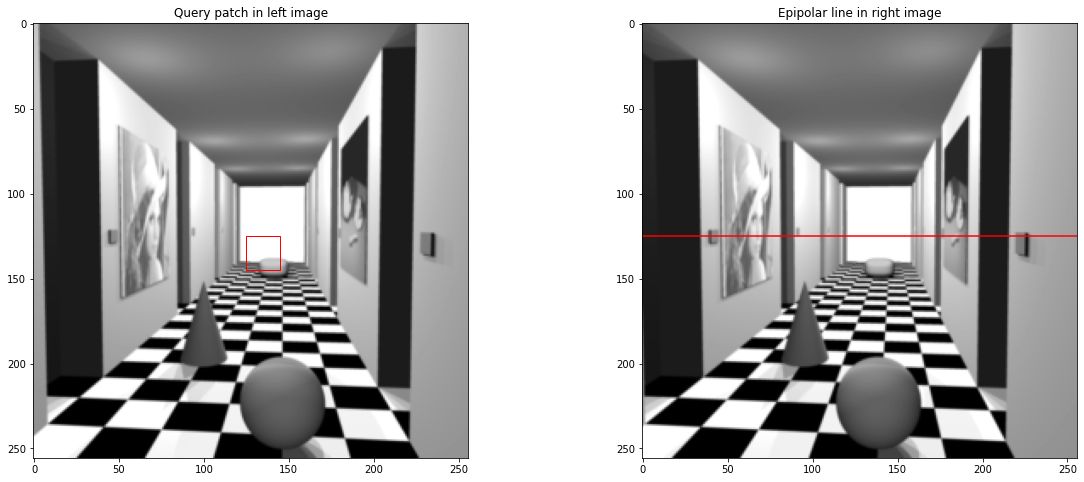

In [183]:
fig, axs = plt.subplots(1,2, figsize=(20, 8))
axs[0].set_title('Query patch in left image')
axs[1].set_title('Epipolar line in right image')
show(left_img, ax=axs[0], patches=[(patch_loc, patch_size),])
show(right_img, ax=axs[1], lines=[(patch_loc[0], patch_loc[1], strip.shape[1], patch_loc[1])])

In [172]:
def find_best_match(patch, strip):
    """Find best patch in strip and return x value of top-right corner"""
    best_x = 1
    best_ssd = 1000000
    patch_w = patch.shape[1]
    strip_w = strip.shape[1]
    ssds = []
    for x in range(patch_w, strip_w - patch_w - 1):
        candidate_patch = strip[:, x:x+patch_w]
        ssd = np.sum((patch - candidate_patch)**2)
        if ssd < best_ssd:
            best_x = x
            best_ssd = ssd
        ssds.append(ssd)
            
    return best_x, ssds

Text(0.5, 0, 'x coordinate of top-left patch')

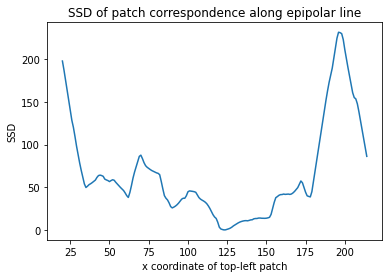

In [182]:
best_x, ssds = find_best_match(patch, strip)
plt.plot([i for i in range(patch.shape[1], patch.shape[1]+len(ssds))], ssds);
plt.title('SSD of patch correspondence along epipolar line');
plt.ylabel('SSD');
plt.xlabel('x coordinate of top-left patch');

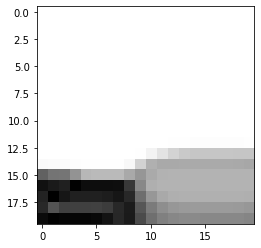

In [185]:
best_match_loc = [best_x, patch_loc[1]]
best_match_size = patch_size
best_match_patch = get_patch(right_img, best_match_loc, best_match_size)
show_patch(best_match_patch)

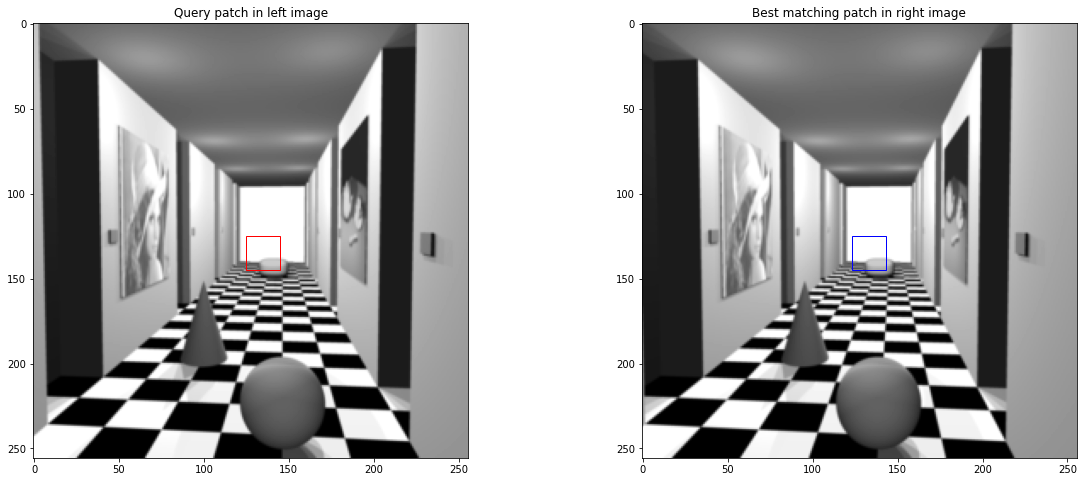

In [186]:
fig, axs = plt.subplots(1,2, figsize=(20, 8))
axs[0].set_title('Query patch in left image')
axs[1].set_title('Best matching patch in right image')
show(left_img, ax=axs[0], patches=[(patch_loc, patch_size),])
show(right_img, ax=axs[1], patches=[(best_match_loc, best_match_size)], color='b')